# 特征工程¶
数据集使用Kaggle Titanic比赛的数据。

## 数据读取

In [2]:
# -*- coding: utf-8 -*-

# 加载需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 载入数据
train = pd.read_csv(u'train.csv')
test = pd.read_csv(u'test.csv')
train.shape,test.shape

((891, 12), (418, 11))

##  查看数据基本情况

In [4]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ..., 
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# 拿出前五条
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# train和test合成
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(1309, 13)

In [11]:
data.tail(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,test
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,test
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,test
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,test
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,test


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 查看数据高级用法

In [13]:
# 看看异常点，比如说缺省值
# data.apply(lambda x: sum(x.isnull()))
count_null = lambda x: sum(x.isnull())
data.apply(count_null)

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
source            0
dtype: int64

In [14]:
# 看看这些字段，分别有多少种取值(甚至你可以看看分布)
var = ['Embarked','Sex','SibSp','Survived']
for v in var:
    print('\n%s这一列数据的不同取值和出现的次数\n'%v)
    print(data[v].value_counts())


Embarked这一列数据的不同取值和出现的次数

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Sex这一列数据的不同取值和出现的次数

male      843
female    466
Name: Sex, dtype: int64

SibSp这一列数据的不同取值和出现的次数

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

Survived这一列数据的不同取值和出现的次数

0.0    549
1.0    342
Name: Survived, dtype: int64


In [15]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Age,22,38,26,35,35,NaN,54,2,27,14,...,NaN,3,NaN,37,28,NaN,39,38.5,NaN,NaN
Cabin,NaN,C85,NaN,C123,NaN,NaN,E46,NaN,NaN,NaN,...,NaN,NaN,NaN,C78,NaN,NaN,C105,NaN,NaN,NaN
Embarked,S,C,S,S,S,Q,S,S,S,C,...,Q,S,Q,Q,S,S,C,S,S,C
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.7208,13.775,7.75,90,7.775,8.05,108.9,7.25,8.05,22.3583
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Riordan, Miss. Johanna Hannah""""","Peacock, Miss. Treasteall","Naughton, Miss. Hannah","Minahan, Mrs. William Edward (Lillian E Thorpe)","Henriksson, Miss. Jenny Lovisa","Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Parch,0,0,0,0,0,0,0,1,2,0,...,0,1,0,0,0,0,0,0,0,1
PassengerId,1,2,3,4,5,6,7,8,9,10,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,3,1,3,3,1,3,3,3
Sex,male,female,female,female,male,male,male,male,female,female,...,female,female,female,female,female,male,female,male,male,male
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,1,0,1,0,0,0,0,0,1


In [16]:
data.sort_index(axis=1, ascending=False).head()

,source,Ticket,Survived,SibSp,Sex,Pclass,PassengerId,Parch,Name,Fare,Embarked,Cabin,Age
0,train,A/5 21171,0.0,1,male,3,1,0,"Braund, Mr. Owen Harris",7.2500,S,NaN,22.0
1,train,PC 17599,1.0,1,female,1,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,C,C85,38.0
2,train,STON/O2. 3101282,1.0,0,female,3,3,0,"Heikkinen, Miss. Laina",7.9250,S,NaN,26.0
3,train,113803,1.0,1,female,1,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,S,C123,35.0
4,train,373450,0.0,0,male,3,5,0,"Allen, Mr. William Henry",8.0500,S,NaN,35.0


In [17]:
data.sort_values(by='Age').head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
1245,0.17,NaN,S,20.5750,"Dean, Miss. Elizabeth Gladys Millvina""""",2,1246,3,female,1,NaN,C.A. 2315,test
1092,0.33,NaN,S,14.4000,"Danbom, Master. Gilbert Sigvard Emanuel",2,1093,3,male,0,NaN,347080,test
803,0.42,NaN,C,8.5167,"Thomas, Master. Assad Alexander",1,804,3,male,0,1.0,2625,train
755,0.67,NaN,S,14.5000,"Hamalainen, Master. Viljo",1,756,2,male,1,1.0,250649,train
469,0.75,NaN,C,19.2583,"Baclini, Miss. Helene Barbara",1,470,3,female,2,1.0,2666,train


In [18]:
data.Sex
data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [19]:
data[0:10]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,train
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,train
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,train
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,train
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,train


In [20]:
data.loc[0:10]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,train
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,train
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,train
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,train
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,train


In [21]:
data.loc[:,['Age','Name']].head()

,Age,Name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"


In [22]:
data.loc[0,'Name']

'Braund, Mr. Owen Harris'

In [23]:
data.at[0,'Name']

'Braund, Mr. Owen Harris'

In [24]:
data.iloc[0]

Age                                 22
Cabin                              NaN
Embarked                             S
Fare                              7.25
Name           Braund, Mr. Owen Harris
Parch                                0
PassengerId                          1
Pclass                               3
Sex                               male
SibSp                                1
Survived                             0
Ticket                       A/5 21171
source                           train
Name: 0, dtype: object

In [25]:
data.iloc[0,0]
data.iat[0,0]

22.0

In [26]:
 data.iloc[0:5,0:2]

,Age,Cabin
0,22.0,NaN
1,38.0,C85
2,26.0,NaN
3,35.0,C123
4,35.0,NaN


In [27]:
data.iloc[[1,2,4],[0,2]]

,Age,Embarked
1,38.0,C
2,26.0,S
4,35.0,S


In [28]:
data.iloc[1:3,:]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train


In [29]:
data[data.Age > 60].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
33,66.0,NaN,S,10.5000,"Wheadon, Mr. Edward H",0,34,2,male,0,0.0,C.A. 24579,train
54,65.0,B30,C,61.9792,"Ostby, Mr. Engelhart Cornelius",1,55,1,male,0,0.0,113509,train
96,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,97,1,male,0,0.0,PC 17754,train
116,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,0.0,370369,train
170,61.0,B19,S,33.5000,"Van der hoef, Mr. Wyckoff",0,171,1,male,0,0.0,111240,train


In [30]:
data[data > 0].head() #所有小于0的数都变成NaN

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",NaN,1,3,male,1.0,NaN,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,2,1,female,1.0,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",NaN,3,3,female,NaN,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,4,1,female,1.0,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",NaN,5,3,male,NaN,NaN,373450,train


## 处理特征（字段）

In [31]:
data2=data.copy()
data2.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [32]:
data2.shape

(1309, 13)

In [33]:
data2['add']=0
data2.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source,add
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train,0


In [34]:
data2['date']=pd.date_range(start='20180330',periods=1309)
data2.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source,add,date
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,test,0,2021-10-24
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,test,0,2021-10-25
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,test,0,2021-10-26
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,test,0,2021-10-27
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,test,0,2021-10-28


In [35]:
data3 = data2.reindex(index=data2.index, columns=list(data2.columns) + ['E'])
data3.loc[0:2,'E']='E'
data3.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source,add,date,E
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train,0,2018-03-30,E
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train,0,2018-03-31,E
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train,0,2018-04-01,E
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train,0,2018-04-02,NaN
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train,0,2018-04-03,NaN


In [36]:
# Ticket字段处理
len(data3['Ticket'].unique())

929

In [37]:
# 类型太多，Ticket字段就不要了
data3.drop('Ticket',axis=1,inplace=True)
data3.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,source,add,date,E
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,train,0,2018-03-30,E
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,train,0,2018-03-31,E
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,train,0,2018-04-01,E
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,train,0,2018-04-02,NaN
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,train,0,2018-04-03,NaN


In [38]:
pd.isna(data3).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,source,add,date,E
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [39]:
data3.dropna(how='any')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,source,add,date,E
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,train,0,2018-03-31,E


In [40]:
data3.fillna(value=5).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,source,add,date,E
0,22.0,5,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,train,0,2018-03-30,E
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,train,0,2018-03-31,E
2,26.0,5,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,train,0,2018-04-01,E
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,train,0,2018-04-02,5
4,35.0,5,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,train,0,2018-04-03,5


In [41]:
values = {'Cabin':'C85','E':'E'}
data3.fillna(value=values).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,source,add,date,E
0,22.0,C85,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,train,0,2018-03-30,E
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,train,0,2018-03-31,E
2,26.0,C85,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,train,0,2018-04-01,E
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,train,0,2018-04-02,E
4,35.0,C85,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,train,0,2018-04-03,E


In [42]:
values = {'Cabin':'C85','E':'E'}
data3.fillna(value=values,limit=1).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,source,add,date,E
0,22.0,C85,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,train,0,2018-03-30,E
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,train,0,2018-03-31,E
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,train,0,2018-04-01,E
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,train,0,2018-04-02,E
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,train,0,2018-04-03,NaN


In [43]:
data3.mean()

Age             29.881138
Fare            33.295479
Parch            0.385027
PassengerId    655.000000
Pclass           2.294882
SibSp            0.498854
Survived         0.383838
add              0.000000
dtype: float64

In [44]:
data3.mean(1).head()

0     4.281250
1    14.285412
2     5.115625
3    11.887500
4     6.381250
dtype: float64

In [45]:
data4=data3.loc[:,['Age','Fare','Pclass']]
data4.head()

,Age,Fare,Pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [46]:
data4.apply(np.cumsum).head()

,Age,Fare,Pclass
0,22.0,7.2500,3
1,60.0,78.5333,4
2,86.0,86.4583,7
3,121.0,139.5583,8
4,156.0,147.6083,11


In [47]:
data4.apply(lambda x: x.max() - x.min())

Age        79.8300
Fare      512.3292
Pclass      2.0000
dtype: float64

In [48]:
ps = pd.Series(data3.loc[:,'Name'])
ps.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [49]:
ps.str.lower().head()

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
3         futrelle, mrs. jacques heath (lily may peel)
4                             allen, mr. william henry
Name: Name, dtype: object

## 其他

In [50]:
left = pd.DataFrame({'key': ['foo', 'left'], 'lval': [1, 2]})
left
right = pd.DataFrame({'key': ['foo', 'right'], 'rval': [4, 5]})

In [51]:
left

,key,lval
0,foo,1
1,left,2


In [52]:
right

,key,rval
0,foo,4
1,right,5


In [53]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4


In [54]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.993983,0.388451,-2.041207,-0.912349
1,-0.292928,0.099297,1.979607,1.110648
2,-0.739621,0.719754,2.069324,-0.970950
3,-1.395536,-0.535747,-1.399892,-2.825498
4,0.574696,0.205977,-1.327493,-0.915864
5,-0.777655,-0.413222,-0.415577,1.144637
6,0.004939,1.665547,1.056352,0.580643
7,-1.219060,-1.007022,-1.938766,-0.718005


In [55]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.993983,0.388451,-2.041207,-0.912349
1,-0.292928,0.099297,1.979607,1.110648
2,-0.739621,0.719754,2.069324,-0.970950
3,-1.395536,-0.535747,-1.399892,-2.825498
4,0.574696,0.205977,-1.327493,-0.915864
5,-0.777655,-0.413222,-0.415577,1.144637
6,0.004939,1.665547,1.056352,0.580643
7,-1.219060,-1.007022,-1.938766,-0.718005
8,-1.395536,-0.535747,-1.399892,-2.825498


In [56]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.462274,1.256567
1,bar,one,2.051553,0.278398
2,foo,two,1.796913,-0.141136
3,bar,three,0.361744,0.141553
4,foo,two,-1.312011,-0.426820
5,bar,two,0.118609,-0.575249
6,foo,one,-0.671755,-1.851878
7,foo,three,0.519067,-1.395412


In [57]:
df.groupby('A').sum()

,C,D
A,,
bar,2.531906,-0.155298
foo,-0.130061,-2.558679


In [58]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    2.051553  0.278398
    three  0.361744  0.141553
    two    0.118609 -0.575249
foo one   -1.134029 -0.595311
    three  0.519067 -1.395412
    two    0.484901 -0.567956

In [59]:
df.groupby('A').size()

A
bar    3
foo    5
dtype: int64

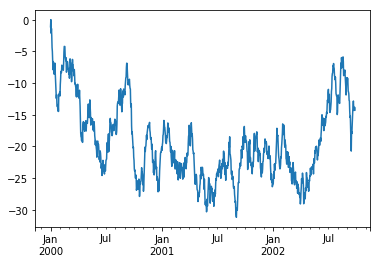

In [60]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

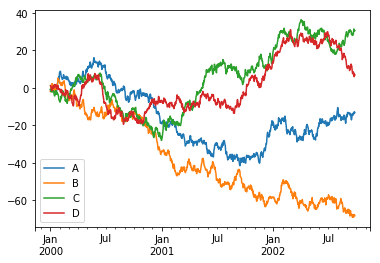

In [61]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')
plt.show()

## 书签
[Numpy和Pandas教程](http://www.voidking.com/2017/02/05/repr-numpy-and-pandas/)   
[Numpy和Matplotlib](http://www.voidking.com/2017/10/08/deve-numpy-matplotlib/)  
[Numpy Quickstart tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)   
[10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html)